# DLSS1 paper Review

https://digitalcommons.morris.umn.edu/cgi/viewcontent.cgi?article=1127&context=horizons


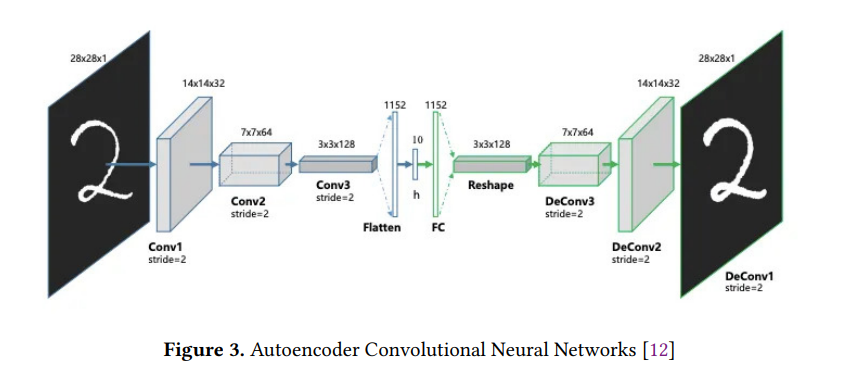

저해상도로 렌더링한 프레임(이미지)을 고해상도처럼 보이도록 업스케일링(upscaling)하고, 동시에 화면 내 물체의 경계선(aliasing 현상)을 제거(anti-aliasing)하여 깔끔한 화질을 제공하는 것.

전통적인 TAA(Temporal Anti-Aliasing)나 체크보드 렌더링 같은 기법보다 높은 화질을 유지하면서도 GPU 부하를 줄이는 게 주된 목표.

신경망을 이용해 업스케일된 고해상도 이미지를 예측하는 구조.

게임 엔진이 저해상도 프레임을 그린 뒤, 해당 프레임의 모션 벡터(전/후 프레임 픽셀 매핑 정보) 등의 보조 정보를 GPU에 전달한다.
NVIDIA Tensor Core 등을 활용해 DLSS 모델이 빠르게 업스케일링 + 노이즈 억제 등을 수행한다.

초기 DLSS는 게임별, 장면별 특화 모델(Per-Game Training)을 적용하였음에도 불구하고 잔상(ghosting)이나 블러 문제 등이 발견되었다.
특히 사물이 빠르게 움직이는 장면에서 TAA 기반보다 훨씬 뛰어난 결과를 기대했으나, 간혹 과도한 디테일 손실이 나타나기도 했다.

# DLSS(Deep Learning Super Sampling)

게임에서 생성된 저해상도 이미지를 고해상도로 ‘업스케일링’하면서, 가능한 한 많은 디테일을 복원(또는 추정)하는 것

Convolutional Auto-encoder Neural Network(CAE) 사용

1. 입력 이미지 자체에 없는 정보(픽셀 디테일)를 신경망이 “추가”해서 만들기 때문에, 정확하지 않은 디테일이 “hallucination” 형태로 생길 수 있음
2. 모션벡터를 사용하였지만 이 모션 벡터 자체는 이미지의 디테일을 늘려주지 못하므로, 여전히 제한적
3. 게임마다 별도로 학습필요
4. 빠르게 움직이는 장면(액션이 많은 FPS, 레이싱 등)에서 잔상(ghosting)이나 뭉개짐(blur) 현상이 발생
